<a href="https://colab.research.google.com/github/eudesz/AnyoneAI_Group_2/blob/BarbaraCraig/Practice_Intro_to_Probability_and_Statistics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Intro to Probability & Statistics

#### TODO:
1. Descriptive Statistics:
    * Calculate statistics such as Mode, Mean, Median and Standard Deviation of weight and age. Do they respond to any known distribution?
    * Carry out an analysis of outliers and missing values.
    * Explain how the metrics vary when we breakdown the dataset by gender. Do they respond to any known distribution? Qualitatively and graphically compare both distributions.
2. Calculate the marginal and joint probability, and the correlation between two other variables, for example alcohol consumption and smoking.
    * Visually represent the joint probability between the possible values of the chosen variables.
3. Answer the following questions: What would happen to smoking levels if smoking is banned in bars? What would happen to the number of alcohol consumers if the number of smokers who drink alcohol decreases?

In [1]:
import copy
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme()

import warnings
warnings.filterwarnings("ignore")

In [2]:
young = pd.read_csv('https://raw.githubusercontent.com/anyoneai/notebooks/main/datasets/people_responses.csv')

In [55]:
young.head(15)

,Music,Slow songs or fast songs,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,...,Age,Height,Weight,Number of siblings,Gender,Left - right handed,Education,Only child,Village - town,House - block of flats
0,5.0,3.0,2.0,1.0,2.0,2.0,1.0,5.0,5.0,1.0,...,20.0,163.0,48.0,1.0,female,right handed,college/bachelor degree,no,village,block of flats
1,4.0,4.0,2.0,1.0,1.0,1.0,2.0,3.0,5.0,4.0,...,19.0,163.0,58.0,2.0,female,right handed,college/bachelor degree,no,city,block of flats
2,5.0,5.0,2.0,2.0,3.0,4.0,5.0,3.0,5.0,3.0,...,20.0,176.0,67.0,2.0,female,right handed,secondary school,no,city,block of flats
3,5.0,3.0,2.0,1.0,1.0,1.0,1.0,2.0,2.0,1.0,...,22.0,172.0,59.0,1.0,female,right handed,college/bachelor degree,yes,city,house/bungalow
4,5.0,3.0,4.0,3.0,2.0,4.0,3.0,5.0,3.0,1.0,...,20.0,170.0,59.0,1.0,female,right handed,secondary school,no,village,house/bungalow
5,5.0,3.0,2.0,3.0,2.0,3.0,3.0,2.0,5.0,5.0,...,20.0,186.0,77.0,1.0,male,right handed,secondary school,no,city,block of flats
6,5.0,5.0,5.0,3.0,1.0,2.0,2.0,5.0,3.0,1.0,...,20.0,177.0,50.0,1.0,female,right handed,secondary school,no,village,house/bungalow
7,5.0,3.0,3.0,2.0,1.0,2.0,2.0,4.0,5.0,1.0,...,19.0,184.0,90.0,1.0,male,right handed,college/bachelor degree,no,city,house/bungalow
8,5.0,3.0,3.0,1.0,1.0,2.0,4.0,3.0,5.0,5.0,...,18.0,166.0,55.0,1.0,female,right handed,secondary school,no,city,house/bungalow
9,5.0,3.0,2.0,5.0,2.0,2.0,5.0,3.0,5.0,2.0,...,19.0,174.0,60.0,3.0,female,right handed,secondary school,no,city,block of flats


*****
## 1. Descriptive statistics

In [3]:
print(young[('Weight')].describe())
print(young['Weight'].mode())




count    990.000000
mean      66.405051
std       13.839561
min       41.000000
25%       55.000000
50%       64.000000
75%       75.000000
max      165.000000
Name: Weight, dtype: float64
0    60.0
dtype: float64


### Frequency Distribution by Age and Weight

In [4]:
print(young['Age'].value_counts)
print(young['Weight'].value_counts)


<bound method IndexOpsMixin.value_counts of 0       20.0
1       19.0
2       20.0
3       22.0
4       20.0
        ... 
1005    20.0
1006    27.0
1007    18.0
1008    25.0
1009    21.0
Name: Age, Length: 1010, dtype: float64>
<bound method IndexOpsMixin.value_counts of 0       48.0
1       58.0
2       67.0
3       59.0
4       59.0
        ... 
1005    57.0
1006    80.0
1007    75.0
1008    58.0
1009    72.0
Name: Weight, Length: 1010, dtype: float64>


### Histogram

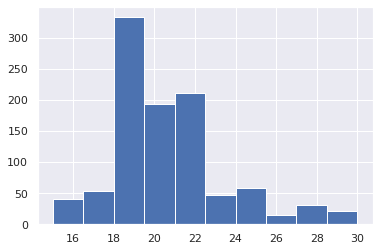

In [49]:
young['Age'].hist()


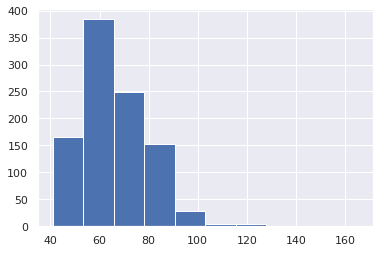

In [50]:
young['Weight'].hist()

### Missing values

In [9]:
print(young["Age"].notna())
print(young["Weight"].notna())

0       True
1       True
2       True
3       True
4       True
        ... 
1005    True
1006    True
1007    True
1008    True
1009    True
Name: Age, Length: 1010, dtype: bool
0       True
1       True
2       True
3       True
4       True
        ... 
1005    True
1006    True
1007    True
1008    True
1009    True
Name: Weight, Length: 1010, dtype: bool


### Outliers

### Gender breakdown

### Correlation between variables

****
## 2. Joint probability

#### To do this we will define the concepts of marginal probability and joint probability

Marginal Probability: Probability of one variable without considering another, for example:

$$P_X=P[X=x]=\sum_{\forall y_i}p_{xy}(x,y_i)$$

#### Joint Probability: In a bivariate or multimavariate sample space, each possible outcome refers to two or more characteristics. Then the probability of a joint outcome is denoted $P(X \cap Y)$ and is defined as:

$$P_{XY}=P[(X=x)\cap(Y=y)]$$

__TODO:__
Do some research on [crosstab](https://pandas.pydata.org/docs/reference/api/pandas.crosstab.html) pandas function.

****
## 3. Answers
### Smoking levels and smoking bans in bars

****
# Extras:

## Other data visualizations

#### We choose some characteristics (numerical) and analyze them breaking down by gender using a box plot